# 采用keras库搭建简单神经网络对CIFAR-10数据集分类
代码流程同"keras_mnist.ipynb"，只是数据集不同，激活函数和网络神经元数量不同。

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [ ]:
'''
ap = argparse.ArgumentParser()
ap.add_argument("-o", "--output", required=True,
            help="path to the output loss/accuracy plot")
args = vars(ap.parse_args())
'''

In [2]:
print("[INFO] loading CIFAR-10 data...")
'''
默认存储路径~/.keras/datasets/
'''
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))
print("[INFO] load CIFAR-10 dataset ok...")

[INFO] loading CIFAR-10 data...
170500096/170498071 [==============================] - 289s 2us/step
[INFO] load CIFAR-10 dataset ok...


In [3]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

labelNames = ["airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"]

In [5]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation = "relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [7]:
print("[INFO] trainning network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
    metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    epochs=40, batch_size=32)

[INFO] trainning network...
Epoch 1/40
1563/1563 [==============================] - 27s 17ms/step - loss: 1.8407 - accuracy: 0.3427 - val_loss: 1.7203 - val_accuracy: 0.3893
Epoch 2/40
1563/1563 [==============================] - 32s 21ms/step - loss: 1.6498 - accuracy: 0.4182 - val_loss: 1.6502 - val_accuracy: 0.4050
Epoch 3/40
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5683 - accuracy: 0.4462 - val_loss: 1.6236 - val_accuracy: 0.4152
Epoch 4/40
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5103 - accuracy: 0.4679 - val_loss: 1.5341 - val_accuracy: 0.4571
Epoch 5/40
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4637 - accuracy: 0.4840 - val_loss: 1.4669 - val_accuracy: 0.4811
Epoch 6/40
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4242 - accuracy: 0.4998 - val_loss: 1.4477 - val_accuracy: 0.4804
Epoch 7/40
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3870 - accuracy:

In [9]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
                           predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.37      0.86      0.51      1000
  automobile       0.71      0.58      0.64      1000
        bird       0.40      0.47      0.44      1000
         cat       0.44      0.26      0.33      1000
        deer       0.41      0.56      0.47      1000
         dog       0.53      0.34      0.42      1000
        frog       0.68      0.53      0.59      1000
       horse       0.68      0.56      0.61      1000
        ship       0.72      0.57      0.64      1000
       truck       0.72      0.46      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.57      0.52      0.52     10000
weighted avg       0.57      0.52      0.52     10000



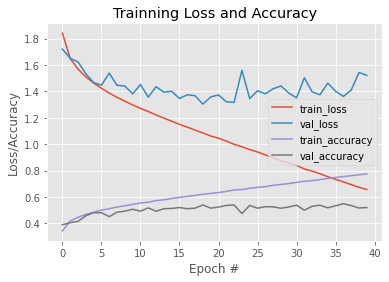

In [11]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_accuracy")
plt.title("Trainning Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("./results/cifar10_trainning_result")